In [1]:
datapath = "../data"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [4]:
tissue='Kidney'
import pandas as pd
from help.preprocess.loaders import feature_assemble_df
import os
df_lab = pd.read_csv(os.path.join(datapath, f'{tissue}_HELP.csv'), index_col=0).replace({'aE':'NE', 'sNE':'NE'})
print(df_lab.value_counts(normalize=False))
features = [{'fname': os.path.join(datapath, f'{tissue}_BIO.csv'), 'fixna' : False, 'normalize': None},
            {'fname': os.path.join(datapath, f'{tissue}_CCcfs.csv'), 'fixna' : False, 'normalize': None},
            {'fname': os.path.join(datapath, f'{tissue}_EmbN2V_128.csv'), 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_lab, features=features, subsample=True, fold=1, seed=1, saveflag=False, verbose=True) 
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

label
NE       16678
E         1253
Name: count, dtype: int64
Majority NE 16678 minoriy E 1253
Subsampling with factor 1:1
[Kidney_BIO.csv] No normalization...
[Kidney_CCcfs.csv] No normalization...
[Kidney_EmbN2V_128.csv] No normalization...
2449 labeled genes over a total of 2506
(2449, 3459) data input


,Gene length,Transcripts count,GC content,GTEX_kidney,Gene-Disease association,OncoDB_expression,HPA_kidney,GO-MF,GO-BP,GO-CC,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A2ML1,64380.0,9.0,44.23,0.039426,7.000000,-0.198023,0.0,4.0,2.0,3.000000,...,0.191344,-0.542462,0.746510,0.082089,-1.109212,0.406936,-1.332319,-0.363864,0.443284,NE
AAMP,6049.0,10.0,56.43,68.648000,7.521266,-0.487936,56.5,2.0,4.0,5.000000,...,0.229680,0.535889,0.432995,-0.131519,-0.017315,0.041874,-1.102342,-0.183920,0.005380,E
AARD,6280.0,2.0,43.16,0.342518,7.788732,-0.248535,1.0,1.0,1.0,4.710227,...,-0.374058,0.275955,-0.530861,-0.406649,0.303176,-0.242258,-0.284188,-0.597559,0.314781,NE
AARS1,37724.0,42.0,49.58,169.322533,2.000000,-0.174407,44.0,9.0,8.0,5.000000,...,-0.001243,-0.385288,-0.113562,-0.308510,-0.278839,0.170950,0.012180,2.139750,-0.506839,E
AATF,107996.0,9.0,40.51,19.484600,8.319502,0.026619,21.8,5.0,12.0,6.000000,...,0.170386,0.082064,-0.120705,0.654565,-1.567841,0.082283,0.605350,1.241107,0.709728,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRSR2,40538.0,6.0,40.35,12.932475,4.000000,0.476567,11.7,5.0,4.0,4.000000,...,0.136922,-0.044823,-0.761108,0.168318,0.310074,-0.674975,-0.456626,-0.879874,-0.867850,NE
ZSCAN16,22393.0,2.0,40.00,6.229560,1.000000,-0.171535,5.5,6.0,1.0,1.000000,...,-0.660592,0.147003,-0.706252,-0.476317,-0.129411,0.316885,-0.291835,-0.575228,-0.098236,NE
ZSCAN4,10217.0,1.0,41.56,0.093657,7.336508,0.000000,0.0,6.0,3.0,3.000000,...,-1.004500,-0.126388,-0.656451,-0.844748,-0.043019,-1.335149,-0.127943,-0.745526,-0.472423,NE
ZSCAN5A,148713.0,18.0,44.09,1.115187,1.000000,0.083817,3.4,6.0,1.0,1.000000,...,-0.783969,-0.261120,-0.293825,1.969112,-0.169576,-0.272387,-0.411483,-0.451970,-1.590691,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

,measure
ROC-AUC,0.9417±0.0086
Accuracy,0.8738±0.0177
BA,0.8736±0.0176
Sensitivity,0.8881±0.0306
Specificity,0.8591±0.0262
MCC,0.7483±0.0355
CM,"[[1103, 139], [170, 1037]]"


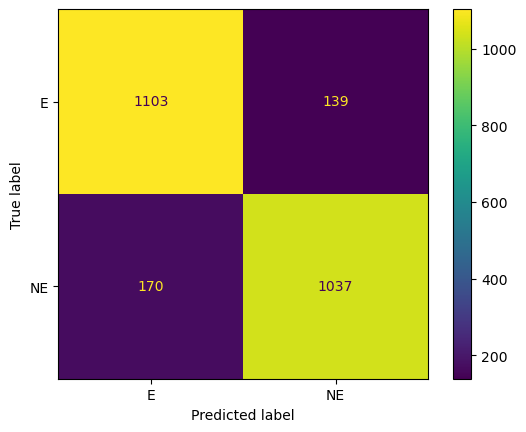

In [6]:
from help.models.prediction import predict_cv
df_scores_means, df_scores, preds = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, saveflag=True, 
                                        #outfile=os.path.join(datapath,f'pred_{tissue}_nospl.csv')
                                        )
df_scores_means

In [32]:
csEGs = pd.read_csv(os.path.join(datapath, f"csEG_{tissue}.txt"), index_col=0).index.values
print(f"TPR csEG: {len(preds.loc[preds.index.isin(list(csEGs))][preds['label'] == preds['prediction']]) / len(preds.loc[preds.index.isin(list(csEGs))])}")
preds.loc[preds.index.isin(list(csEGs))]

TPR csEG: 0.7241379310344828


/var/folders/gl/gkr8rrn52y9cvb9jc59pvjyw0000gn/T/ipykernel_23125/2336485605.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"TPR csEG: {len(preds.loc[preds.index.isin(list(csEGs))][preds['label'] == preds['prediction']]) / len(preds.loc[preds.index.isin(list(csEGs))])}")


,label,prediction
gene,,
ARF4,0,0
DDX11,0,0
GEMIN7,0,0
KIF4A,0,0
METAP2,0,0
NHLRC2,0,1
PPP1CA,0,0
PPP4R2,0,0
RBM42,0,0


# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3459) data input


5-fold: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]


,measure
ROC-AUC,0.9534±0.0032
Accuracy,0.9136±0.0097
BA,0.8689±0.0213
Sensitivity,0.7930±0.0425
Specificity,0.9448±0.0060
MCC,0.7361±0.0329
CM,"[[985, 257], [265, 4536]]"


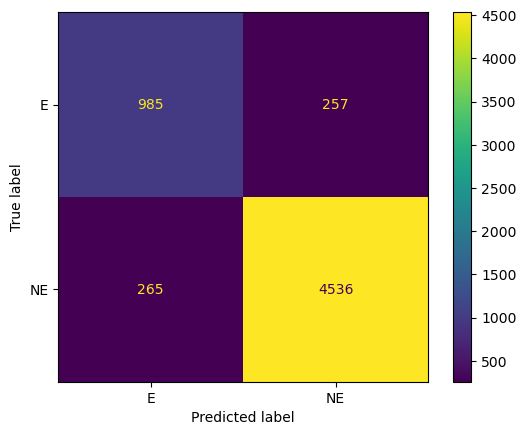

In [10]:
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, fold=4, seed=1, verbose=True)
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means